# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [0]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [0]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [0]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [0]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [0]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [0]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f421fc88>]],
      dtype=object)

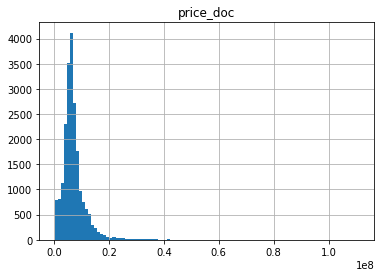

In [0]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18f437c9b0>]],
      dtype=object)

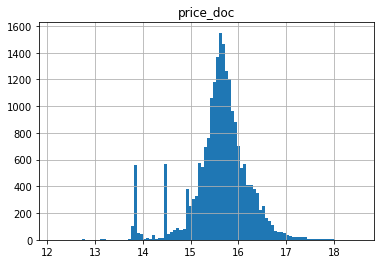

In [0]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

In [0]:
from sklearn.ensemble import RandomForestRegressor 

### BEGIN Solution
m = RandomForestRegressor(random_state=666)
m.fit(X_train,y_train_log)


### END Solution

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=666, verbose=0, warm_start=False)

Print the 20 most important features and their **values**.

In [0]:
### BEGIN Solution

imp = m.feature_importances_
imp_idcs = np.argsort(imp)[::-1]

for i in range(20):
    print("Feature: {}. Importance: {}".format(X_train.columns[imp_idcs[i]], imp[imp_idcs[i]]))

### END Solution

Feature: full_sq. Importance: 0.23933271470195402
Feature: cafe_count_5000_price_2500. Importance: 0.03465215061372931
Feature: sport_count_3000. Importance: 0.026264410440406623
Feature: cafe_count_2000. Importance: 0.013565568849142933
Feature: cafe_count_3000. Importance: 0.012355560880705945
Feature: num_room. Importance: 0.011280095129796532
Feature: micex_cbi_tr. Importance: 0.008144976672810283
Feature: swim_pool_km. Importance: 0.00808772340233334
Feature: public_healthcare_km. Importance: 0.007325632693443923
Feature: micex_rgbi_tr. Importance: 0.007264195068381096
Feature: eurrub. Importance: 0.0072185643963814565
Feature: metro_km_avto. Importance: 0.0070595907843988654
Feature: ttk_km. Importance: 0.006988714217703282
Feature: brent. Importance: 0.006897528619488788
Feature: usdrub. Importance: 0.006822716222327813
Feature: catering_km. Importance: 0.006583617334291242
Feature: kindergarten_km. Importance: 0.006518280915449407
Feature: floor. Importance: 0.00643437896746402

(array([555.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.01196664, 0.02393327, 0.03589991, 0.04786654,
        0.05983318, 0.07179981, 0.08376645, 0.09573309, 0.10769972,
        0.11966636, 0.13163299, 0.14359963, 0.15556626, 0.1675329 ,
        0.17949954, 0.19146617, 0.20343281, 0.21539944, 0.22736608,
        0.23933271]),
 <a list of 20 Patch objects>)

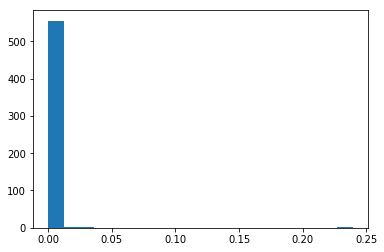

In [0]:
plt.hist(imp, bins=20)

<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [0]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor 

def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(),
        "RFR": RandomForestRegressor(n_estimators =100)
    }
        
        
        

### BEGIN Solution
    
    error_train = []
    error_test = []
    for model_name, model in methods.items():
        model.fit(X_train, y_train)
        error_train.append(mean_squared_log_error(y_train, model.predict(X_train)))
        error_test.append(mean_squared_log_error(y_test, model.predict(X_test)))

### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [0]:
### BEGIN Solution
my_train = X_train[['full_sq', 
         'cafe_count_5000_price_2500', 
         'sport_count_3000', 
         'cafe_count_2000', 
         'cafe_count_3000',
         'num_room',
         'micex_cbi_tr',
         'swim_pool_km',
         'public_healthcare_km',
         'micex_rgbi_tr',
         'eurrub',
         'metro_km_avto',
         'ttk_km',
         'brent',
         'usdrub',
         'catering_km',
         'kindergarten_km',
         'floor',
         'church_synagogue_km',
         'big_road1_km']]

my_test = X_test[['full_sq', 
         'cafe_count_5000_price_2500', 
         'sport_count_3000', 
         'cafe_count_2000', 
         'cafe_count_3000',
         'num_room',
         'micex_cbi_tr',
         'swim_pool_km',
         'public_healthcare_km',
         'micex_rgbi_tr',
         'eurrub',
         'metro_km_avto',
         'ttk_km',
         'brent',
         'usdrub',
         'catering_km',
         'kindergarten_km',
         'floor',
         'church_synagogue_km',
         'big_road1_km']]

comparator(my_train, y_train_log, my_test, y_test_log)
### END Solution

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Test loss,Train loss
0,RFR,0.000869,1.236667e-04
1,Ridge,0.001054,1.042980e-03
2,Dtree,0.001820,1.159717e-09
3,Linear Regression,0.001054,1.042980e-03


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [0]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    ### BEGIN Solution
    not_used_columns = set(X.columns) - set(used_features)
    for elem in not_used_columns:
        X_with_new_feature = X[used_features + [elem]]
        scores[elem] = np.mean(cross_val_score(model, X_with_new_feature, y, scoring=make_scorer(mean_squared_log_error, greater_is_better=False), cv=cv,))
    ### END Solution

    return scores

In [0]:
len(X_train.columns)

560

In [0]:
def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    
    round = 0
    score = np.infty
    ind = -1
    while round < n_rounds:
        round = round + 1
        if len(feat_best_list) == X.shape[1]:
            break
  
        min_key = None
        curr_min = np.infty
        for key, value in selection_step(method, X, y, feat_best_list).items():
            if value < curr_min:
                curr_min = value
                min_key = key

        if curr_min < score:
            score = curr_min
            feat_best_list.append(min_key)
            round = 0

    ### END Solution
    
    return feat_best_list


Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [0]:
%%time
### BEGIN Solution
best_features = forward_steps(X_train, y_train_log, 10, DecisionTreeRegressor(max_depth=3, random_state=666))
### END Solution

CPU times: user 12min 34s, sys: 1.09 s, total: 12min 35s
Wall time: 12min 56s


Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [0]:
### BEGIN Solution
comparator(X_train[best_features], y_train_log, X_test[best_features], y_test_log)
### END Solution

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Test loss,Train loss
0,RFR,0.001361,0.001367
1,Ridge,0.001361,0.001367
2,Dtree,0.001361,0.001367
3,Linear Regression,0.001361,0.001367


In [0]:
best_features

['sub_area_Juzhnoe Medvedkovo',
 'sub_area_Severnoe Medvedkovo',
 'sub_area_Molzhaninovskoe',
 'sub_area_Koptevo',
 'sub_area_Mozhajskoe',
 'sub_area_Silino',
 'sub_area_Rjazanskij',
 'sub_area_Hovrino',
 "sub_area_Moskvorech'e-Saburovo",
 'sub_area_Ochakovo-Matveevskoe',
 'sub_area_Novo-Peredelkino',
 "sub_area_Chertanovo Central'noe"]

<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 514kB/s ta 0:00:01


In [0]:
### BEGIN Solution
from tqdm import tqdm
from scipy.optimize import golden
from sklearn.tree import DecisionTreeRegressor

class GB(object):
    
    ll = lambda y, x: np.log(1+np.exp(-y*x)).sum()
    ll_derivative = lambda y, x: (-y)/(1+np.exp(y*x))
    
    def __init__(self, n_estimators, elementary_class, elementary_params={}):
        assert n_estimators > 0, "You probably need at least one estimator"
        
        self.n_estimators = n_estimators
        self.elementary_class = elementary_class
        self.elementary_params = elementary_params
        self.estimators = []
        self.estimators_weights = []
        
    
    def predict(self, X):
        assert len(self.estimators) > 0 and (len(self.estimators) == len(self.estimators_weights)), "First call predict!"
        predictions = np.zeros(X.shape[0])
        for elementary, weight in zip(self.estimators, self.estimators_weights):
            predictions += weight * elementary.predict(X)
        return np.sign(predictions)

    
    def fit(self, X_train, y_train):
        assert tuple(np.sort(np.unique(y_train))) == (-1,1), "I will work only for -1;1 targets"
    
        self.estimators = []
        self.estimators_weights = []
        predictions = np.zeros(X_train.shape[0])
        for i in tqdm(range(self.n_estimators)):
            residuals = GB.ll_derivative(y_train, np.sign(predictions))
            elementary = self.elementary_class(**self.elementary_params)
            elementary.fit(X_train, -residuals)

            elementary_predict = elementary.predict(X_train)
            to_optimize = lambda gamma: GB.ll(y_train, predictions + gamma * elementary_predict) 
            gamma = golden(to_optimize)

            self.estimators.append(elementary)
            self.estimators_weights.append(gamma)
            
            predictions += gamma * elementary_predict
            # predictions = np.sign(predictions)
            
        return self


    
gb = GB(100, DecisionTreeRegressor, {'max_depth': 3})
gb.fit(X_train, y_train*2-1)

print(len(gb.estimators))
print(len(gb.estimators_weights))

### END Solution

100%|██████████| 100/100 [00:00<00:00, 180.54it/s]

100
100


Text(0, 0.5, '$x_2$')

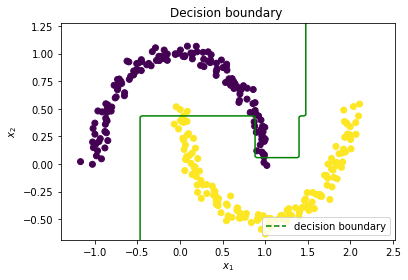

In [0]:
def expand(a, b, factor=0.2):
    return a - abs(a) * factor, b + abs(b) * factor

X_l, X_h = X_train.min(axis=0), X.max(axis=0)
xx0, xx1 = np.meshgrid(np.linspace(*expand(X_l[0], X_h[0]), num=100),
                       np.linspace(*expand(X_l[1], X_h[1]), num=100))

X_grid = np.c_[xx0.ravel(), xx1.ravel()]
prediction = gb.predict(X_grid)
a = plt.contour(xx0, xx1, prediction.reshape(xx0.shape[0], xx0.shape[1]), levels=0, colors='g')
plt.legend([a.collections[0]], ['decision boundary'], loc='lower right')
plt.scatter(X[:,0],X[:,1], c = y)
plt.title('Decision boundary ')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

In [0]:
tr_u, tr_cnts = np.unique(y_train, return_counts=True)
test_u, test_cnts = np.unique(y_test, return_counts=True)
print("Train unique values: {}. Train unique values counts: {}".format(tr_u, tr_cnts))
print("Test unique values: {}. Test unique values counts: {}".format(test_u, test_cnts))

Train unique values: [0 1]. Train unique values counts: [88 92]
Test unique values: [0 1]. Test unique values counts: [62 58]


As we can see train and test are pretty balanced, so let's just check accuracy score

In [0]:
from sklearn.metrics import accuracy_score
predictions = ((gb.predict(X_test) + 1)/2).astype(np.int32) # back to 0,1
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.975


<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

Training time: 0.0173
Training time: 0.0223
Training time: 6.2590


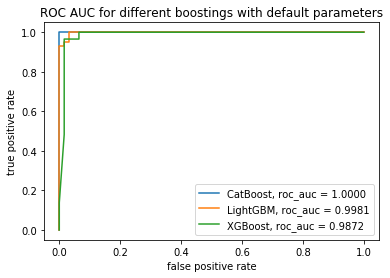

In [0]:
### BEGIN Solution
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
import time

clf = XGBClassifier()
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print("Training time: {0:.4f}".format(end-start))
roc_curve_xgb = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(roc_curve_xgb[0], roc_curve_xgb[1])


clf = LGBMClassifier()
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print("Training time: {0:.4f}".format(end-start))
roc_curve_lgbm = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_lgbm = auc(roc_curve_lgbm[0], roc_curve_lgbm[1])


clf = CatBoostClassifier(verbose = False)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print("Training time: {0:.4f}".format(end - start))
roc_curve_cboost = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_cboost = auc(roc_curve_cboost[0], roc_curve_cboost[1])

plt.title('ROC AUC for different boostings with default parameters')
plt.plot(roc_curve_cboost[0], roc_curve_cboost[1], label='CatBoost, roc_auc = %.4f' % roc_auc_cboost)
plt.plot(roc_curve_lgbm[0], roc_curve_lgbm[1], label='LightGBM, roc_auc = %.4f' % roc_auc_lgbm)
plt.plot(roc_curve_xgb[0], roc_curve_xgb[1], label='XGBoost, roc_auc = %.4f' % roc_auc_xgb)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot()
plt.legend()
### END Solution

In [0]:
from sklearn.model_selection import GridSearchCV
depths = [1, 2, 3, 4, 5, 6]
estimators = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
lr = [0.001, 0.01, 0.1, 1]
params = {'max_depth': depths, 'n_estimators': estimators, 'learning_rate': lr}
# cboost added a lot of aliases hence we can use single params dict

In [0]:
gscv = GridSearchCV(XGBClassifier(), params, cv=5)
gscv.fit(X_train, y_train)
xgb = gscv.best_estimator_

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
gscv = GridSearchCV(LGBMClassifier(), params, cv=5)
gscv.fit(X_train, y_train)
lgb = gscv.best_estimator_

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
gscv = GridSearchCV(CatBoostClassifier(verbose = False), params, cv=5)
gscv.fit(X_train, y_train)
cboost = gscv.best_estimator_

/home/dmitriy/MyEnv/other/skoltech/ml/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
cboost

In [0]:
lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=2,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

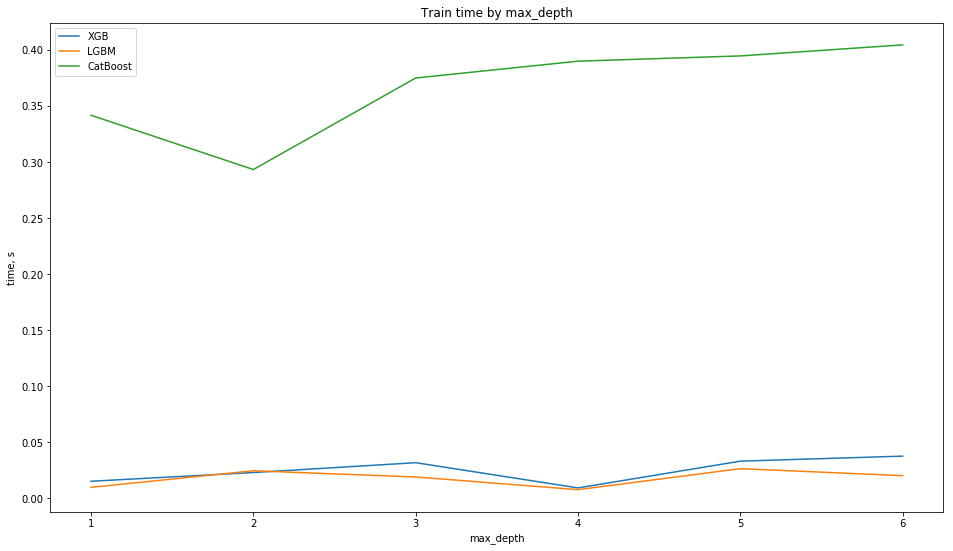

In [0]:
plt.figure(figsize=(16,9))

times_xgb = []
times_lgb = []
times_cboost = []
for d in depths:
    clf = XGBClassifier(max_depth=d, n_estimators=50)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_xgb.append(end-start)
    clf = LGBMClassifier(max_depth=d, n_estimators=50)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_lgb.append(end-start)
    clf = CatBoostClassifier(max_depth=d, verbose = False, n_estimators=50)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_cboost.append(end-start)
    
plt.title('Train time by max_depth')
plt.plot(depths, times_xgb)
plt.plot(depths, times_lgb)
plt.plot(depths, times_cboost)
plt.xlabel('max_depth')
plt.ylabel('time, s')
plt.legend([
    'XGB',
    'LGBM',
    'CatBoost'
])
plt.show()

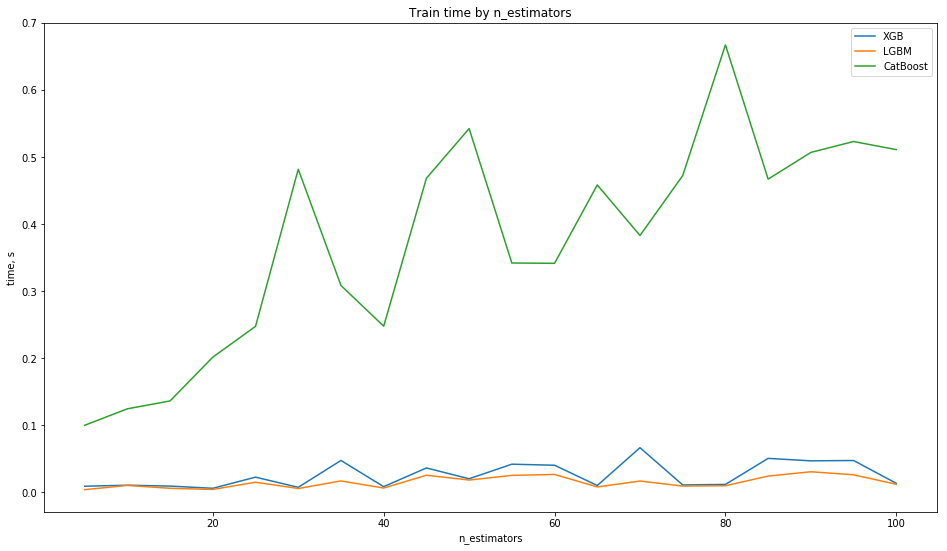

In [0]:
plt.figure(figsize=(16,9))

times_xgb = []
times_lgb = []
times_cboost = []
for n in estimators:
    clf = XGBClassifier(n_estimators=n, max_depth=5)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_xgb.append(end-start)
    clf = LGBMClassifier(n_estimators=n, max_depth=5)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_lgb.append(end-start)
    clf = CatBoostClassifier(n_estimators=n, verbose = False, max_depth=5)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    times_cboost.append(end-start)
    
plt.title('Train time by n_estimators')
plt.plot(estimators, times_xgb)
plt.plot(estimators, times_lgb)
plt.plot(estimators, times_cboost)
plt.xlabel('n_estimators')
plt.ylabel('time, s')
plt.legend([
    'XGB',
    'LGBM',
    'CatBoost'
])
plt.show()

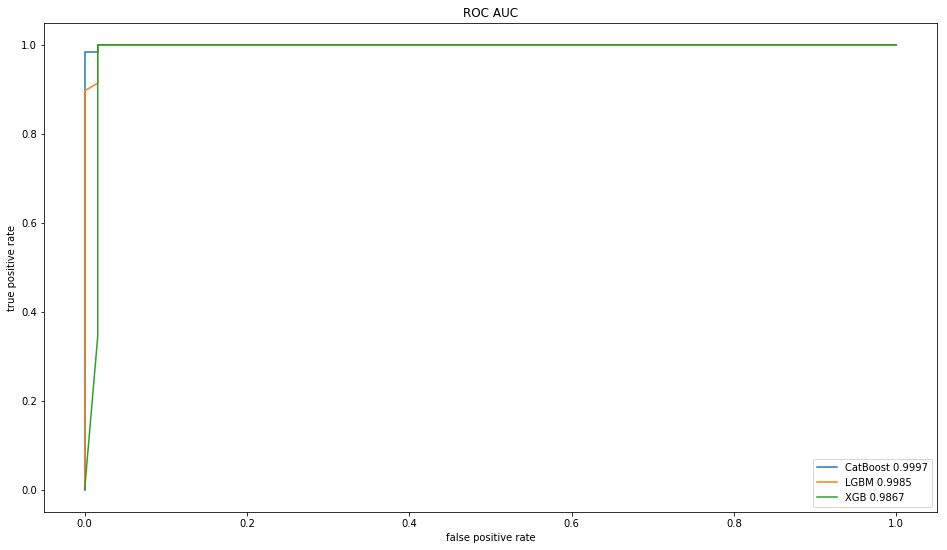

In [0]:
plt.figure(figsize=(16,9))

roc_curve_xgb = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
roc_curve_cboost = roc_curve(y_test, cboost.predict_proba(X_test)[:,1])
roc_curve_lgb = roc_curve(y_test, lgb.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(roc_curve_xgb[0], roc_curve_xgb[1])
roc_auc_cboost = auc(roc_curve_cboost[0],roc_curve_cboost[1])
roc_auc_lgb = auc(roc_curve_lgb[0],roc_curve_lgb[1])
plt.title('ROC AUC')
plt.plot(roc_curve_cboost[0], roc_curve_cboost[1])
plt.plot(roc_curve_lgb[0], roc_curve_lgb[1])
plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend([
    'CatBoost %.4f' % roc_auc_cboost,
    'LGBM %.4f' % roc_auc_lgb,
    'XGB %.4f' % roc_auc_xgb
           ])
plt.show()

<br>

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

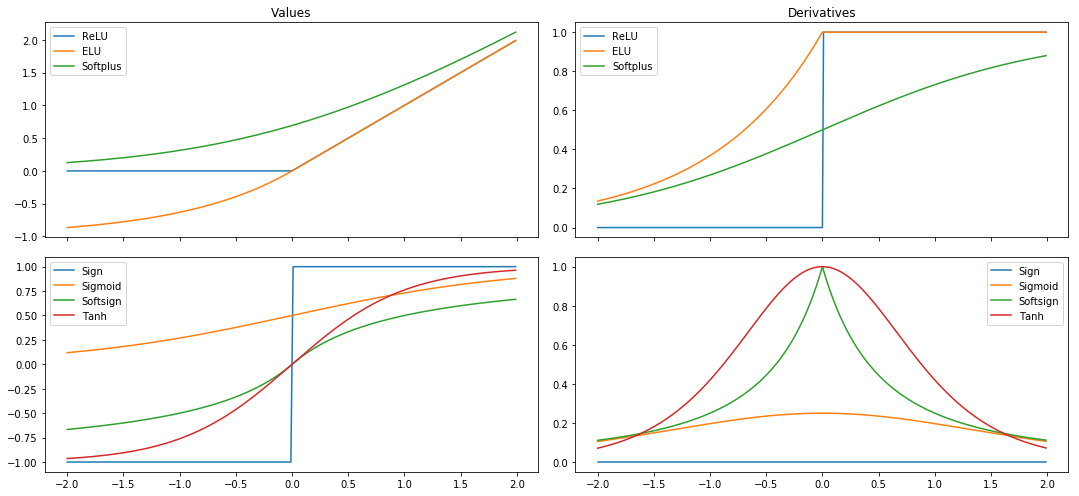

In [0]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


x = torch.arange(-2, 2, .01, requires_grad=True)
# ?
#x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        z = activation(x)
        axes[i, 0].plot(x.tolist(), z.tolist(), label=function_name)
        z.sum().backward()
        axes[i, 1].plot(x.tolist(), x.grad.tolist(), label=function_name)
        x.grad.data.zero_() # inplace 
        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

> Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

According to the derivatives plots we can see that

* **sign** is definitely bad choice because we'll not be able to change the weights of our Variables
* **sigmoid** is ok for *not* deep neural networks, but the situation changes when we start to work with really deep neutral networks. The vanishing gradients problem arises https://www.quora.com/What-is-the-vanishing-gradient-problem . The same is true for **softsign** and **Tanh**
* On the other hand **relu** is still non linear function, but if we look closely at the process of weights changing we'll see that $ w_0^{*} - 1\cdot1\cdot1\cdot1\cdot \dotso \cdot \frac{df(w_0^*, w_1^*, w_2^*, \dotso)}{d w_0} $ looks better than $ w_0^{*} - 0.1\cdot0.21\cdot0.1\cdot0.01\cdot \dotso \cdot \frac{df(w_0^*, w_1^*, w_2^*, \dotso)}{d w_0} $ because in the second case weights would change slowly. **relu** is widely used in real deep learning tasks as a common choice as activation
* Still there is another one problem which is called *dead weights and units* or *dying relu* (https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks). **ELU** and **Softplus** address to solve such problem.

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [0]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [0]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty(self.thetas.shape)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty(self.bias.shape)


    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        self.thetas_grads += (output_grad[..., None] @ x[None,]).transpose()
        self.bias_grads += np.sum(output_grad)
        ### END Solution
        input_grad = self.thetas @ output_grad
        return input_grad


class LogisticActivation:
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = np.diag((np.exp(x)/(np.exp(x)+1)**2)) @ output_grad
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    
    def softmax_grad(self,s): 
        # Take the derivative of softmax element w.r.t the each logit which is usually Wi * X
        # input s is softmax value of the original input x. 
        # s.shape = (1, n) 
        # i.e. s = np.array([0.3, 0.7]), x = np.array([0, 1])
        # initialize the 2-D jacobian matrix.
        jacobian_m = np.diag(s)
        for i in range(len(jacobian_m)):
            for j in range(len(jacobian_m)):
                if i == j:
                    jacobian_m[i][j] = s[i] * (1-s[i])
                else: 
                    jacobian_m[i][j] = -s[i]*s[j]
        return jacobian_m

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        e = np.exp(x)
        summary = np.sum(e)
        input_grad = (self.softmax_grad(self.forward(x)) @ output_grad).transpose()
        ### END Solution
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    
    def forward(self, x):
        #print (f'Mlp: x.shape = {x.shape}')
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        input_ = x
        input_2 = self.linear1.forward(x)
        input_3 = self.activation1.forward(input_2)
                
        self.linear1.backward(input_, self.activation1.backward(input_2, self.linear2.backward(input_3, output_grad)))
        # ... calculate and update grads
        ### END Solution

In [0]:
### BEGIN Solution
# Please, implement here everything else you need, like the loss function.
# work for one sample
def cross_entropy(X,y):
    p = SoftMaxActivation().forward(X)
    log_likelihood = -np.log(p[y])
    loss = np.sum(log_likelihood)
    return loss

def delta_cross_entropy(X,y):
    grad = SoftMaxActivation().forward(X)
    grad[y] -= 1
    return grad
### END Solution

Starting epoch 0 Starting epoch 10 Starting epoch 20 Starting epoch 30 Starting epoch 40 Starting epoch 50 Starting epoch 60 Starting epoch 70 Starting epoch 80 Starting epoch 90 Starting epoch 100 Starting epoch 110 Starting epoch 120 Starting epoch 130 Starting epoch 140 Starting epoch 150 Starting epoch 160 Starting epoch 170 Starting epoch 180 Starting epoch 190 

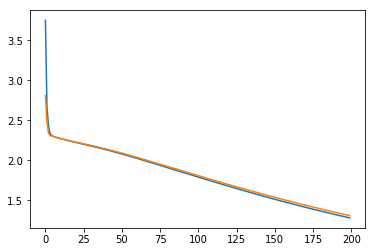

In [0]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]

        ### BEGIN Solution
        # ... zero the gradients
        mlp.linear1.bias_grads=np.zeros(mlp.linear1.bias_grads.shape)
        mlp.linear2.bias_grads=np.zeros(mlp.linear2.bias_grads.shape)
        mlp.linear1.thetas_grads=np.zeros(mlp.linear1.thetas_grads.shape)
        mlp.linear2.thetas_grads=np.zeros(mlp.linear2.thetas_grads.shape)
        # prediction = mlp.forward(x)
        prediction = mlp.forward(x)
        # loss = # use cross entropy loss
        loss = cross_entropy(prediction, target)
        #print(loss)
        # learning_curve[epoch] += loss
        learning_curve[epoch] += loss
        # ... perform backward pass
        mlp.backward(x, delta_cross_entropy(prediction, target))
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.bias=mlp.linear1.bias-learning_rate*mlp.linear1.bias_grads
        mlp.linear2.bias=mlp.linear2.bias-learning_rate*mlp.linear2.bias_grads
        mlp.linear1.thetas=mlp.linear1.thetas-learning_rate*mlp.linear1.thetas_grads
        mlp.linear2.thetas=mlp.linear2.thetas-learning_rate*mlp.linear2.thetas_grads
    
    # learning_curve[epoch] /= train_size
    learning_curve[epoch] /= train_size
    # prediction = mlp.forward(x_test)
    prediction = [mlp.forward(x) for x in x_test]
    # loss = # use cross entropy loss
    loss = np.sum([cross_entropy(p, target) for p, target in zip(prediction, targets_test)])
    # test_curve[epoch] = loss
    test_curve[epoch] = loss  / len(targets_test)
    ### END Solution


plt.plot(learning_curve)
plt.plot(test_curve)

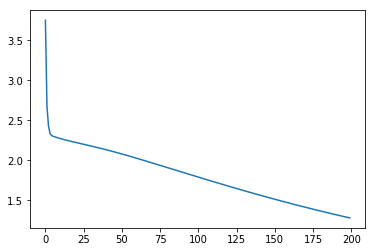

In [0]:
plt.plot(learning_curve)

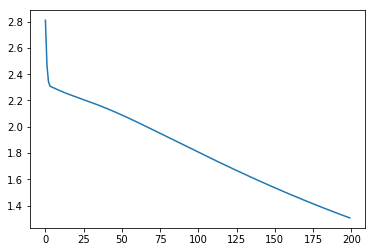

In [0]:
plt.plot(test_curve)

In [0]:
predictions = np.argmax(mlp.forward(digits), -1)
pd.DataFrame(confusion_matrix(targets, predictions))

,0,1,2,3,4,5,6,7,8,9
0,173,0,0,0,2,1,1,0,0,1
1,0,123,8,5,7,1,5,16,4,13
2,0,2,168,1,0,0,0,3,0,3
3,2,1,3,151,0,7,0,8,0,11
4,1,0,2,0,176,0,0,2,0,0
5,0,0,2,0,3,158,1,0,0,18
6,1,1,0,0,5,0,174,0,0,0
7,0,0,1,0,1,2,0,172,3,0
8,1,41,22,20,4,8,7,10,55,6
9,1,2,0,5,6,3,0,11,0,152


### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.zip to data.zip
User uploaded file "data.zip" with length 69336802 bytes


In [7]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: data/cats_dogs/
   creating: data/cats_dogs/.ipynb_checkpoints/
  inflating: data/cats_dogs/.ipynb_checkpoints/train-checkpoint.csv  
  inflating: data/cats_dogs/.ipynb_checkpoints/validation-checkpoint.csv  
   creating: data/cats_dogs/train/
  inflating: data/cats_dogs/train.csv  
   creating: data/cats_dogs/train/cats/
  inflating: data/cats_dogs/train/cats/cat.0.jpg  
  inflating: data/cats_dogs/train/cats/cat.1.jpg  
  inflating: data/cats_dogs/train/cats/cat.10.jpg  
  inflating: data/cats_dogs/train/cats/cat.100.jpg  
  inflating: data/cats_dogs/train/cats/cat.101.jpg  
  inflating: data/cats_dogs/train/cats/cat.102.jpg  
  inflating: data/cats_dogs/train/cats/cat.103.jpg  
  inflating: data/cats_dogs/train/cats/cat.104.jpg  
  inflating: data/cats_dogs/train/cats/cat.105.jpg  
  inflating: data/cats_dogs/train/cats/cat.106.jpg  
  inflating: data/cats_dogs/train/cats/cat.107.jpg  
  inflati

In [0]:
!mkdir models/

In [0]:
!mkdir models/sgd0001

In [0]:
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import PIL.Image as Image
from torch import nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import transforms, utils

Make sure you are using the right device.

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [13]:
!ls

data  data.zip	models	sample_data


First take a look at the data.

In [14]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

,path,y
0,cats_dogs/train/dogs/dog.342.jpg,1
1,cats_dogs/train/cats/cat.661.jpg,0
2,cats_dogs/train/cats/cat.516.jpg,0
3,cats_dogs/train/dogs/dog.938.jpg,1
4,cats_dogs/train/cats/cat.224.jpg,0


Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [0]:
#Change class name 
import os
class CatsDogs(Dataset):
    """ Some documantation"""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
        """
        ### BEGIN Solution
        self.dt = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        ### END Solution
    

    def __getitem__(self, idx):
        ### BEGIN Solution
        # ... don't forget to augment your data for training, using the `transform` parameter of the constructor
        img = Image.open(os.path.join(self.root_dir, self.dt['path'].iloc[idx]))
        if self.transform:
            img  = self.transform(img)
        
        tt = transforms.ToTensor()
        img = tt(img)
        y = self.dt['y'].iloc[idx]
        ### END Solution
        return img, torch.tensor(y)
    
    
    def __len__(self):
        ### BEGIN Solution
        return len(self.dt)
        ### END Solution

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [0]:
data_transform = transforms.Compose([
    ### BEGIN Solution
    transforms.RandomChoice(
        [
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.Compose([
                transforms.RandomRotation(degrees=(-20,20)),
                transforms.RandomHorizontalFlip(),
            ]),
            transforms.Compose([
                transforms.RandomRotation(degrees=(-20,20)),
                transforms.RandomVerticalFlip(),
            ]),
            transforms.RandomRotation(degrees=(-20,20))
        ]
    ),
    transforms.RandomCrop((300,300), pad_if_needed=True)
    ### END Solution
    ])

### BEGIN Solution
dataset_train = CatsDogs('data/cats_dogs/train.csv', 'data/', transform=data_transform)
dataset_val = CatsDogs('data/cats_dogs/validation.csv', 'data/', transform=transforms.CenterCrop((300,300)))
train_loader = DataLoader(dataset_train, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=100)
### END Solution

Make sure that dataloader works as expected by observing one sample from it.

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor(1)


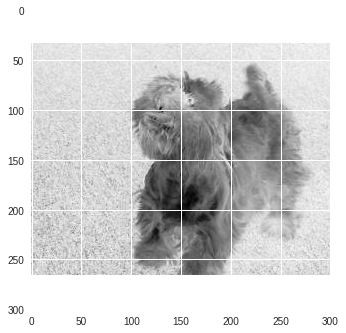

In [26]:
for X,y in train_loader:
    print(X[0])
    print(y[0])
    plt.imshow(np.array(X[0,0,:,:]))
    break

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        ### BEGIN Solution
        self.conv1 = nn.Conv2d(3, 6, (5,5), padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*73*73, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 2)
        ### END Solution
    def forward(self, x):
        ### BEGIN Solution
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, 16*73*73)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        ### END Solution 
    

Send your model to GPU, if you have it.

In [0]:
model = LeNet().to(device)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [0]:
### BEGIN Solution
criterion = nn.CrossEntropyLoss()
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

In [0]:
### BEGIN Solution
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

In [22]:
!pip install livelossplot

  Stored in directory: /root/.cache/pip/wheels/bf/66/07/e3129f723b6b36ee4affde650ad6843fceaf5c2fa5dc29b986
Successfully built livelossplot


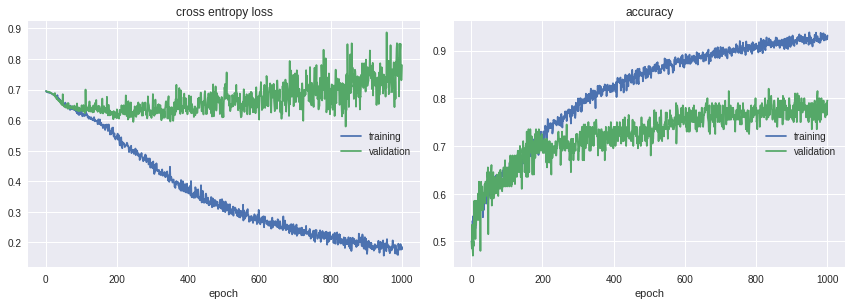

cross entropy loss:
training   (min:    0.156, max:    0.695, cur:    0.177)
validation (min:    0.579, max:    0.887, cur:    0.780)

accuracy:
training   (min:    0.500, max:    0.938, cur:    0.932)
validation (min:    0.470, max:    0.820, cur:    0.795)
CPU times: user 3h 50min 39s, sys: 15min 59s, total: 4h 6min 39s
Wall time: 4h 1min 14s


In [31]:
%%time
### BEGIN Solution
from livelossplot import PlotLosses

dataloaders = {
    "train": train_loader,
    "validation": val_loader
}

def train_model(model, criterion, optimizer, num_epochs=10, path_to_save_models='models/sgd0001/'):
    liveloss = PlotLosses()
    model = model.to(device)
    
    for epoch in range(num_epochs):
        logs = {}
        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.detach() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)
            
            prefix = ''
            if phase == 'validation':
                prefix = 'val_'

            logs[prefix + 'cross entropy loss'] = epoch_loss.item()
            logs[prefix + 'accuracy'] = epoch_acc.item()
        
        liveloss.update(logs)
        liveloss.draw()
        
        if epoch % 10 == 9:
            torch.save(model.state_dict(), os.path.join(path_to_save_models, 'epoch_{}.mdl'.format(epoch)))
        
### END Solution

train_model(model, criterion, optimizer, num_epochs=1000)

In [33]:
!ls models/sgd0001

epoch_109.mdl  epoch_299.mdl  epoch_479.mdl  epoch_659.mdl  epoch_839.mdl
epoch_119.mdl  epoch_29.mdl   epoch_489.mdl  epoch_669.mdl  epoch_849.mdl
epoch_129.mdl  epoch_309.mdl  epoch_499.mdl  epoch_679.mdl  epoch_859.mdl
epoch_139.mdl  epoch_319.mdl  epoch_49.mdl   epoch_689.mdl  epoch_869.mdl
epoch_149.mdl  epoch_329.mdl  epoch_509.mdl  epoch_699.mdl  epoch_879.mdl
epoch_159.mdl  epoch_339.mdl  epoch_519.mdl  epoch_69.mdl   epoch_889.mdl
epoch_169.mdl  epoch_349.mdl  epoch_529.mdl  epoch_709.mdl  epoch_899.mdl
epoch_179.mdl  epoch_359.mdl  epoch_539.mdl  epoch_719.mdl  epoch_89.mdl
epoch_189.mdl  epoch_369.mdl  epoch_549.mdl  epoch_729.mdl  epoch_909.mdl
epoch_199.mdl  epoch_379.mdl  epoch_559.mdl  epoch_739.mdl  epoch_919.mdl
epoch_19.mdl   epoch_389.mdl  epoch_569.mdl  epoch_749.mdl  epoch_929.mdl
epoch_209.mdl  epoch_399.mdl  epoch_579.mdl  epoch_759.mdl  epoch_939.mdl
epoch_219.mdl  epoch_39.mdl   epoch_589.mdl  epoch_769.mdl  epoch_949.mdl
epoch_229.mdl  epoch_409.mdl  epoch_599

In [0]:
from google.colab import files
files.download('models/sgd0001/epoch_999.mdl') 

In [36]:
# model loading
model = LeNet().to(device)
model.load_state_dict(torch.load('models/sgd0001/epoch_999.mdl'))
model.eval()

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=85264, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [37]:
for phase in ['train', 'validation']:
  if phase == 'train':
      model.train()
  else:
      model.eval()

  running_corrects = 0

  for inputs, labels in dataloaders[phase]:
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs)
      loss = criterion(outputs, labels)

      _, preds = torch.max(outputs, 1)
      running_corrects += torch.sum(preds == labels.data)

  epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)
  
  print("{phase} accuracy: {accuracy}".format(phase=phase, accuracy=epoch_acc))

        

train accuracy: 0.9200000166893005
validation accuracy: 0.7949999570846558


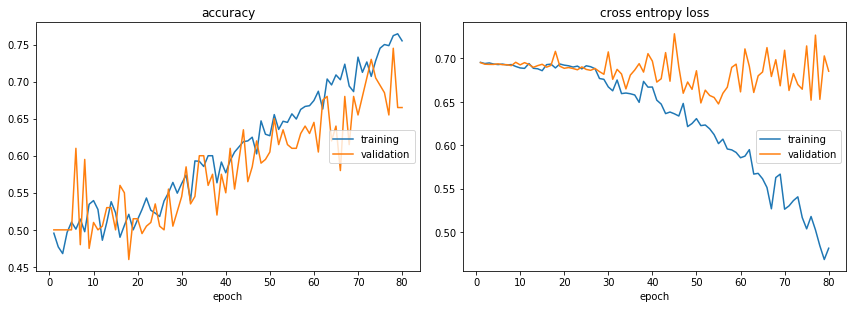

accuracy:
training   (min:    0.468, max:    0.765, cur:    0.755)
validation (min:    0.460, max:    0.745, cur:    0.665)

cross entropy loss:
training   (min:    0.468, max:    0.695, cur:    0.481)
validation (min:    0.648, max:    0.728, cur:    0.685)


In [0]:
# This is a try with bigger learning rate on cpu (bs 40)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_model(model, criterion, optimizer, num_epochs=80, path_to_save_models='models/sgdlr001/')

I didn't emphasized any significant foundings connected with optimizers for such task.
But I accomplished to solve task with gpu (colaboratory) and bigger batch size. 

Also I have pretty strange learning curves for validation, it looks more like overfitting, but at the same time accuracy continued to grow. It may happen because of strong augmentation on the train data. I think that without augmentation I would reach such result faster, but the model quality in the end would be worse.

### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.

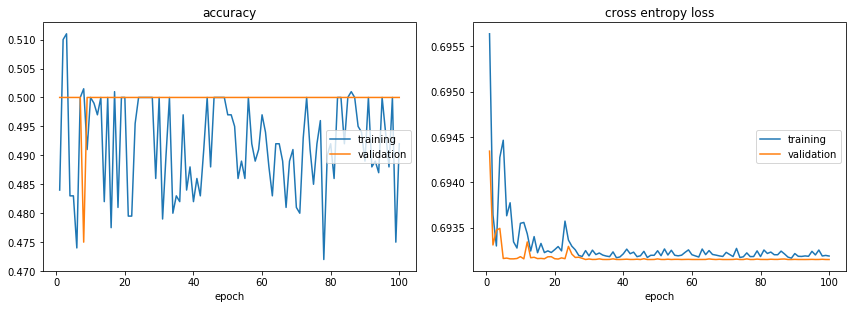

accuracy:
training   (min:    0.472, max:    0.511, cur:    0.492)
validation (min:    0.475, max:    0.500, cur:    0.500)

cross entropy loss:
training   (min:    0.693, max:    0.696, cur:    0.693)
validation (min:    0.693, max:    0.694, cur:    0.693)
CPU times: user 3h 24min 23s, sys: 27min 53s, total: 3h 52min 17s
Wall time: 1h 59min 30s


In [0]:
%%time
class LeNetOfASmoker(nn.Module):
    def __init__(self):
        super().__init__()
        ### BEGIN Solution
        self.conv1 = nn.Conv2d(3, 6, (5,5), padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*73*73, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 2)
        ### END Solution
    def forward(self, x):
        ### BEGIN Solution
        x = F.max_pool2d(F.sigmoid(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.sigmoid(self.conv2(x)), (2,2))
        x = x.view(-1, 16*73*73)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        ### END Solution 
        
model = LeNetOfASmoker().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_model(model, criterion, optimizer, num_epochs=100, path_to_save_models='models/sigmoid/')

### As we can see we can't train this model so easy as we did earlier...